<a href="https://colab.research.google.com/github/OumaimaJouiri/INSE6220Project/blob/main/occupancy_Classification_with_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [2]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The examined group comprised kernels belonging to three different varieties of wheat: Kama, Rosa and Canadian, 70 elements each, randomly selected for
the experiment. High quality visualization of the internal kernel structure was detected using a soft X-ray technique. It is non-destructive and considerably cheaper than other more sophisticated imaging techniques like scanning microscopy or laser technology. The images were recorded on 13x18 cm X-ray KODAK plates. Studies were conducted using combine harvested wheat grain originating from experimental fields, explored at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin.

The data set can be used for the tasks of classification and cluster analysis.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.
All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/seeds

In [6]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/OumaimaJouiri/INSE6220Project/main/dataset.txt', delimiter = ",",parse_dates=['date'])
df.head(25)

date  Temperature   Humidity  Light         CO2  \
1  2015-02-04 17:51:00       23.180  27.272000  426.0  721.250000   
2  2015-02-04 17:51:59       23.150  27.267500  429.5  714.000000   
3  2015-02-04 17:53:00       23.150  27.245000  426.0  713.500000   
4  2015-02-04 17:54:00       23.150  27.200000  426.0  708.250000   
5  2015-02-04 17:55:00       23.100  27.200000  426.0  704.500000   
6  2015-02-04 17:55:59       23.100  27.200000  419.0  701.000000   
7  2015-02-04 17:57:00       23.100  27.200000  419.0  701.666667   
8  2015-02-04 17:57:59       23.100  27.200000  419.0  699.000000   
9  2015-02-04 17:58:59       23.100  27.200000  419.0  689.333333   
10 2015-02-04 18:00:00       23.075  27.175000  419.0  688.000000   
11 2015-02-04 18:01:00       23.075  27.150000  419.0  690.250000   
12 2015-02-04 18:02:00       23.100  27.100000  419.0  691.000000   
13 2015-02-04 18:03:00       23.100  27.166667  419.0  683.500000   
14 2015-02-04 18:04:00       23.050  27.150000  419.0  687.500000   
15 2015-02-04 18:04:59       23.000  27.125000  419.0  686.000000   
16 2015-02-04 18:06:00       23.000  27.125000  418.5  680.500000   
17 2015-02-04 18:07:00       23.000  27.200000    0.0  681.500000   
18 2015-02-04 18:08:00       22.945  27.290000    0.0  685.000000   
19 2015-02-04 18:08:59       22.945  27.390000    0.0  685.000000   
20 2015-02-04 18:10:00       22.890  27.390000    0.0  689.000000   
21 2015-02-04 18:10:59       22.890  27.390000    0.0  689.500000   
22 2015-02-04 18:11:59       22.890  27.390000    0.0  689.000000   
23 2015-02-04 18:13:00       22.890  27.445000    0.0  691.000000   
24 2015-02-04 18:14:00       22.890  27.500000    0.0  688.000000   
25 2015-02-04 18:15:00       22.890  27.500000    0.0  689.500000   

    HumidityRatio  Occupancy  
1        0.004793          1  
2        0.004783          1  
3        0.004779          1  
4        0.004772          1  
5        0.004757          1  
6        0.004757          1  
7        0.004757          1  
8        0.004757          1  
9        0.004757          1  
10       0.004745          1  
11       0.004741          1  
12       0.004739          1  
13       0.004751          1  
14       0.004734          1  
15       0.004715          1  
16       0.004715          1  
17       0.004728          0  
18       0.004728          0  
19       0.004745          0  
20       0.004730          0  
21       0.004730          0  
22       0.004730          0  
23       0.004739          0  
24       0.004749          0  
25       0.004749          0

In [7]:
# transforming date feature into duration
pos = df.columns.get_loc('date')
df['duration'] =  df.iloc[1:, pos] - df.iat[0, pos]

In [8]:
df.duration=df.duration.dt.total_seconds()

In [9]:
df.duration[0]=0
df.duration=df.duration.astype(int)

In [10]:
df=df.rename(columns={'Occupancy':'class'})

In [11]:
# dropping date column
df=df.drop('date',axis=1)

In [12]:
df.head()

Temperature  Humidity  Light     CO2  HumidityRatio  class  duration
1        23.18   27.2720  426.0  721.25       0.004793      1         0
2        23.15   27.2675  429.5  714.00       0.004783      1        59
3        23.15   27.2450  426.0  713.50       0.004779      1       120
4        23.15   27.2000  426.0  708.25       0.004772      1       180
5        23.10   27.2000  426.0  704.50       0.004757      1       240

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    8143 non-null   float64
 1   Humidity       8143 non-null   float64
 2   Light          8143 non-null   float64
 3   CO2            8143 non-null   float64
 4   HumidityRatio  8143 non-null   float64
 5   class          8143 non-null   int64  
 6   duration       8143 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 767.0+ KB


In [14]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [15]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

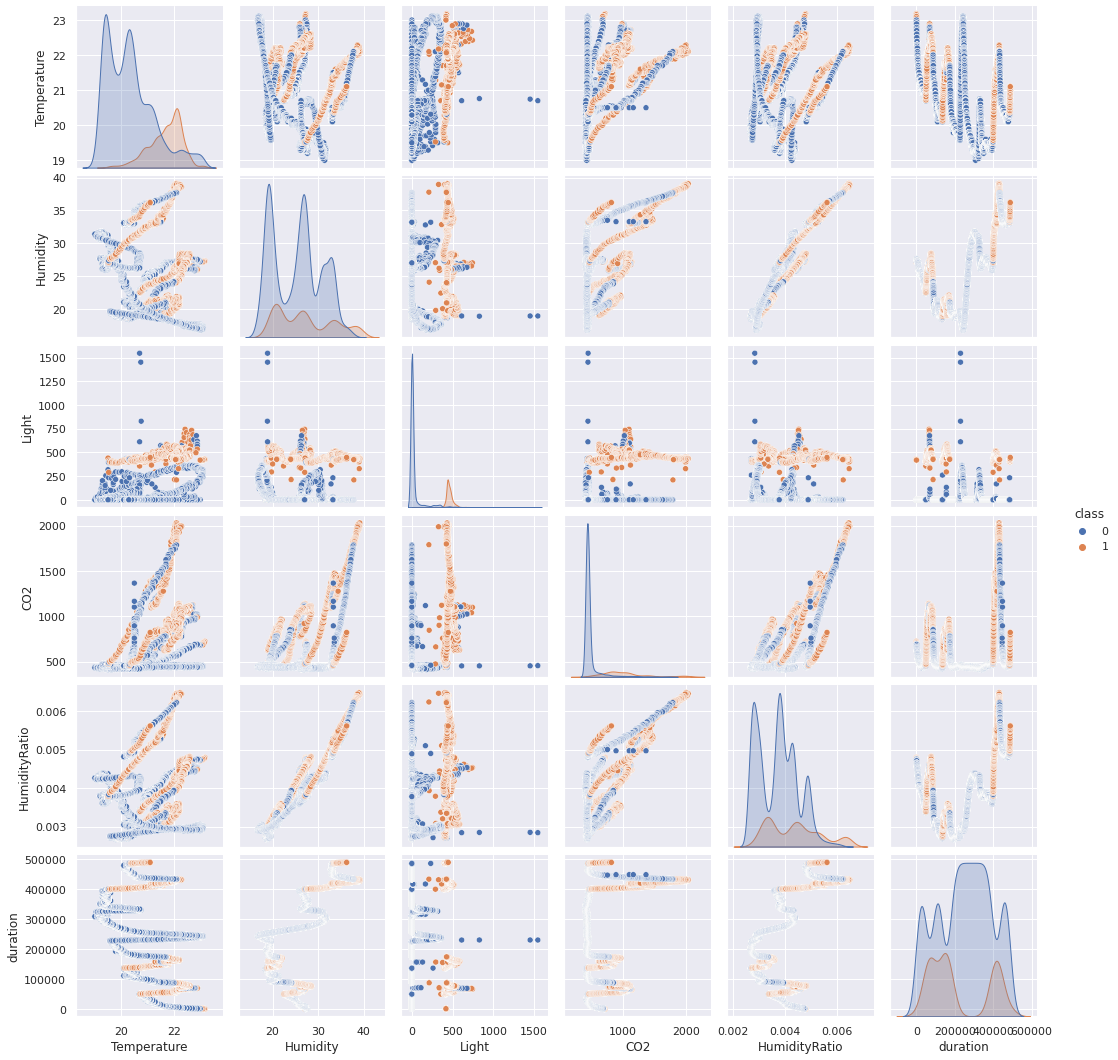

In [16]:
sns.set(rc={'figure.figsize':(7,5)})
sns.pairplot(df, hue='class')

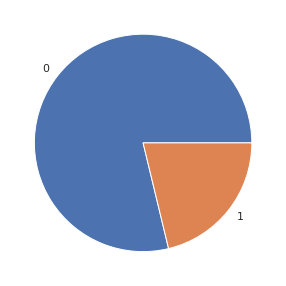

In [17]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [18]:
X = df.drop(columns=['class'])
X.head(10)

Temperature  Humidity  Light         CO2  HumidityRatio  duration
1        23.180   27.2720  426.0  721.250000       0.004793         0
2        23.150   27.2675  429.5  714.000000       0.004783        59
3        23.150   27.2450  426.0  713.500000       0.004779       120
4        23.150   27.2000  426.0  708.250000       0.004772       180
5        23.100   27.2000  426.0  704.500000       0.004757       240
6        23.100   27.2000  419.0  701.000000       0.004757       299
7        23.100   27.2000  419.0  701.666667       0.004757       360
8        23.100   27.2000  419.0  699.000000       0.004757       419
9        23.100   27.2000  419.0  689.333333       0.004757       479
10       23.075   27.1750  419.0  688.000000       0.004745       540

In [19]:
X.describe().transpose()

count           mean            std         min  \
Temperature    8143.0      20.619084       1.016916   19.000000   
Humidity       8143.0      25.731507       5.531211   16.745000   
Light          8143.0     119.519375     194.755805    0.000000   
CO2            8143.0     606.546243     314.320877  412.750000   
HumidityRatio  8143.0       0.003863       0.000852    0.002674   
duration       8143.0  244259.688812  141049.557259    0.000000   

                         25%            50%            75%            max  
Temperature        19.700000      20.390000      21.390000      23.180000  
Humidity           20.200000      26.222500      30.533333      39.117500  
Light               0.000000       0.000000     256.375000    1546.333333  
CO2               439.000000     453.500000     638.833333    2028.500000  
HumidityRatio       0.003078       0.003801       0.004352       0.006476  
duration       122130.000000  244259.000000  366390.000000  488520.000000

**Standardize the Data**

In [20]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Temperature  Humidity     Light       CO2  HumidityRatio  duration
0     2.518470  0.278526  1.573763  0.364948       1.091757 -1.731836
1     2.488967  0.277713  1.591735  0.341881       1.080555 -1.731418
2     2.488967  0.273645  1.573763  0.340290       1.075888 -1.730985
3     2.488967  0.265508  1.573763  0.323587       1.066555 -1.730560
4     2.439796  0.265508  1.573763  0.311655       1.049523 -1.730134
5     2.439796  0.265508  1.537818  0.300520       1.049523 -1.729716
6     2.439796  0.265508  1.537818  0.302641       1.049523 -1.729283
7     2.439796  0.265508  1.537818  0.294156       1.049523 -1.728865
8     2.439796  0.265508  1.537818  0.263400       1.049523 -1.728440
9     2.415210  0.260988  1.537818  0.259158       1.035863 -1.728007

In [21]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Temperature    8143.0  7.818326e-16  1.000061 -1.592248 -0.903850 -0.225287   
Humidity       8143.0  4.467615e-16  1.000061 -1.624791 -1.000115  0.088773   
Light          8143.0  2.233807e-16  1.000061 -0.613726 -0.613726 -0.613726   
CO2            8143.0 -1.884775e-16  1.000061 -0.616593 -0.533075 -0.486941   
HumidityRatio  8143.0  1.116904e-16  1.000061 -1.394355 -0.920148 -0.072438   
duration       8143.0  5.584519e-17  1.000061 -1.731836 -0.865917 -0.000005   

                    75%       max  
Temperature    0.758139  2.518470  
Humidity       0.868186  2.420232  
Light          0.702747  7.326619  
CO2            0.102726  4.524170  
HumidityRatio  0.574253  3.066492  
duration       0.865921  1.731840

**Observations and variables**

In [22]:
observations = list(X.index)
variables = list(X.columns)

**Box and Whisker Plots**

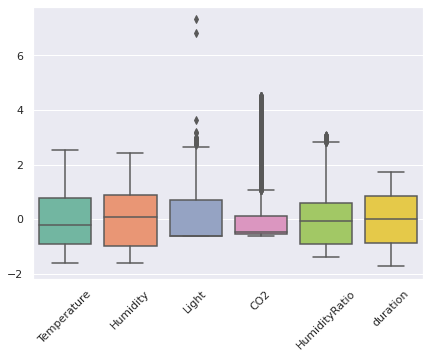

In [23]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

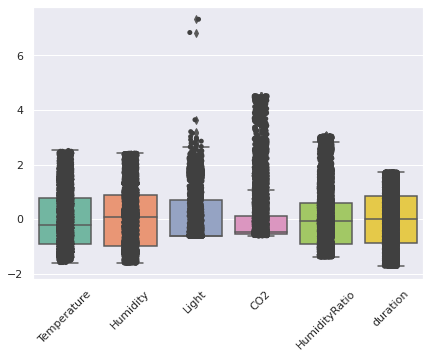

In [24]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

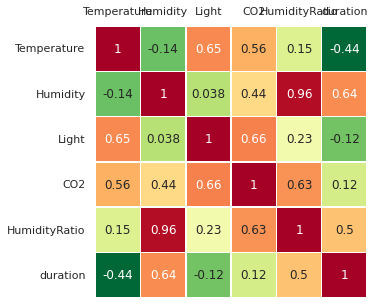

In [25]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);
sns.set(rc={'figure.figsize':(7,5)})
# X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
# sns.clustermap(X.corr(), annot=True, fmt='.2f')

## **Principal Component Analysis (PCA)**

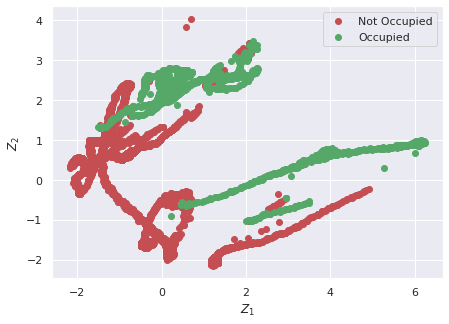

In [26]:
pca = PCA()
Z = pca.fit_transform(X)

# 1 NotOccupied->0,  2 Occupied->1
idx_NotOcc = np.where(y == 0)
idx_Occ = np.where(y == 1)

plt. figure()
plt.scatter(Z[idx_NotOcc,0], Z[idx_NotOcc,1], c='r', label='Not Occupied')
plt.scatter(Z[idx_Occ,0], Z[idx_Occ,1], c='g', label='Occupied')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$');

**Eigenvectors**

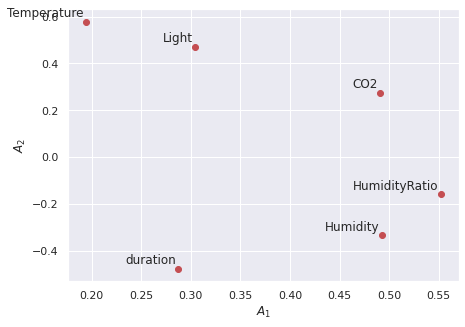

In [27]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

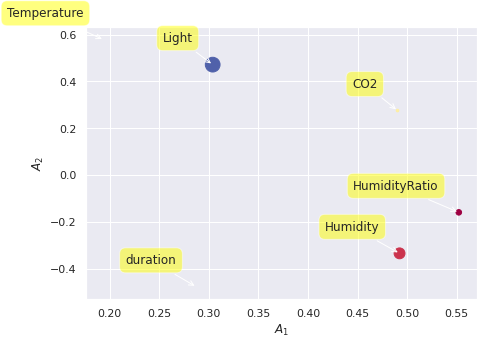

In [28]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

In [29]:
#Eigenvalues
Lambda = pca.explained_variance_ 

In [30]:
Lambda

array([2.85127727e+00, 2.20327777e+00, 4.98495910e-01, 2.32750807e-01,
       2.14218719e-01, 7.16444708e-04])

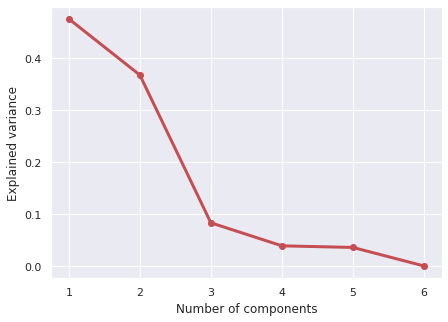

In [31]:
#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') ;

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

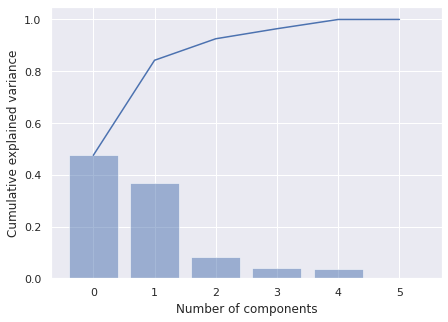

In [32]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

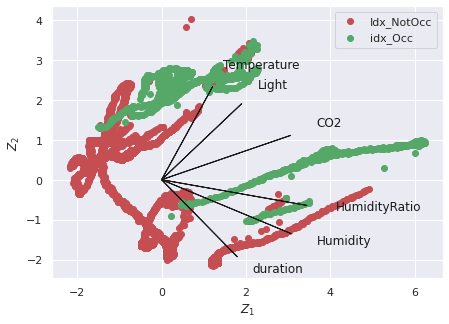

In [33]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:, 0]
A2 = A[:, 1]
Z1 = Z[:, 0]
Z2 = Z[:, 1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
    # arrows project features as vectors onto PC axes
    plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2),
              color='k', width=0.0005, head_width=0.0025)
    plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2, variables[i], color='k')

plt.scatter(Z[idx_NotOcc, 0], Z[idx_NotOcc, 1], c='r', label='Idx_NotOcc')
plt.scatter(Z[idx_Occ, 0], Z[idx_Occ, 1], c='g', label='idx_Occ')
plt.legend(loc='upper right')

## **Using PCA Library**

In [34]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [36]:
out['PC']

PC1       PC2       PC3       PC4
0     1.387570  2.860861 -1.261140  0.104770
1     1.369536  2.847784 -1.240073  0.130804
2     1.358840  2.840765 -1.247535  0.121491
3     1.341615  2.840176 -1.242850  0.118536
4     1.316951  2.810964 -1.224314  0.149846
...        ...       ...       ...       ...
8138  3.384659 -0.614245  0.672890  0.030338
8139  3.368813 -0.603265  0.685674  0.024677
8140  3.422725 -0.579364  0.656010 -0.001287
8141  3.488313 -0.575264  0.642089  0.008311
8142  3.499897 -0.535558  0.691309  0.036087

[8143 rows x 4 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [8143] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [8143] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7beae05490>)

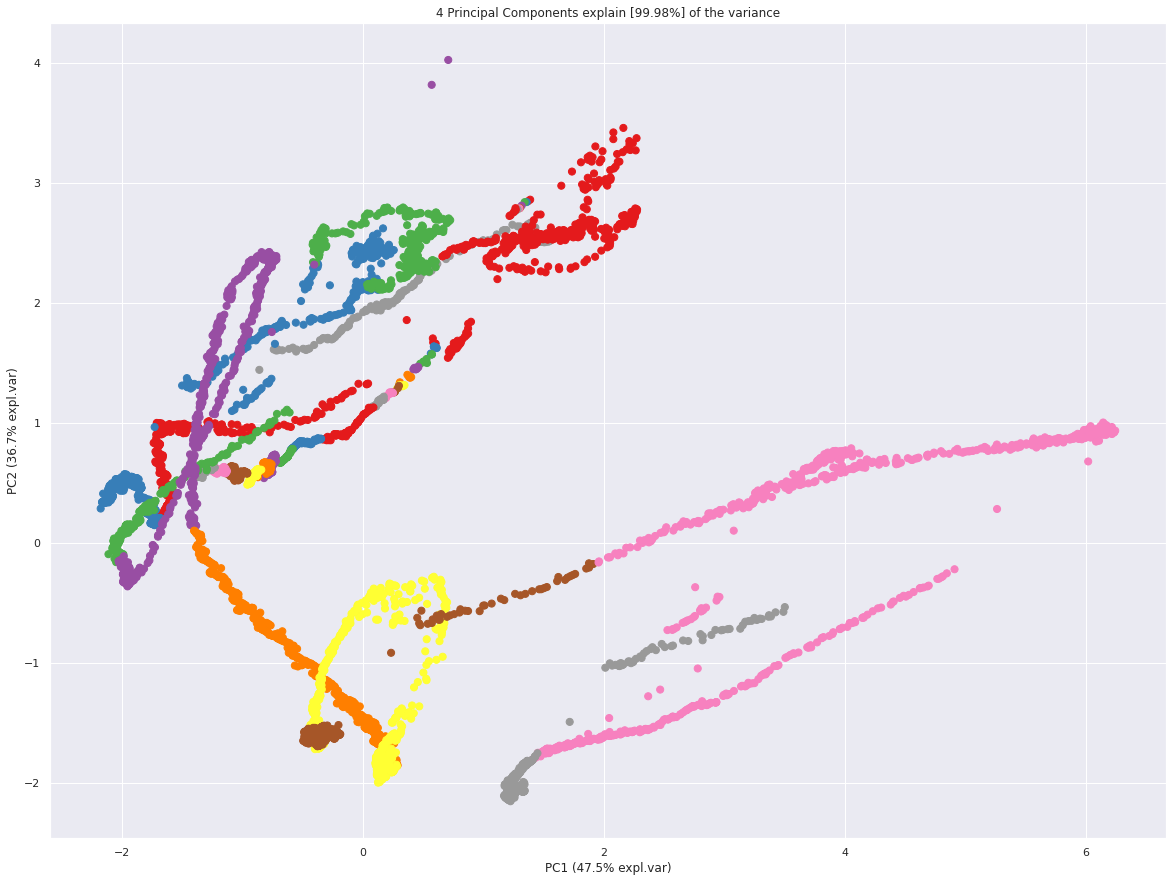

In [37]:
model.scatter(label=None, legend=False)

**Eigenvectors**

In [38]:
A = out['loadings'].T

In [39]:
A

PC1       PC2       PC3       PC4
Temperature    0.193904  0.578428 -0.264345 -0.666188
Humidity       0.492301 -0.335125 -0.281138  0.235758
Light          0.303829  0.471975  0.580988  0.434286
CO2            0.490285  0.275578  0.074250  0.013476
HumidityRatio  0.552056 -0.159775 -0.361809  0.061675
duration       0.287374 -0.478414  0.614099 -0.554997

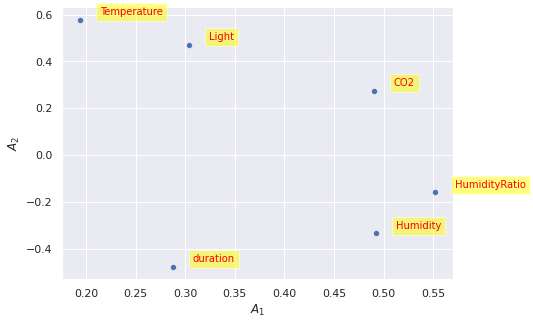

In [40]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
    plt.text(x=A.PC1[i]+0.02, y=A.PC2[i]+0.02, s=variables[i],
             fontdict=dict(color='red', size=10),
             bbox=dict(facecolor='yellow', alpha=0.5))

**Scree Plot**

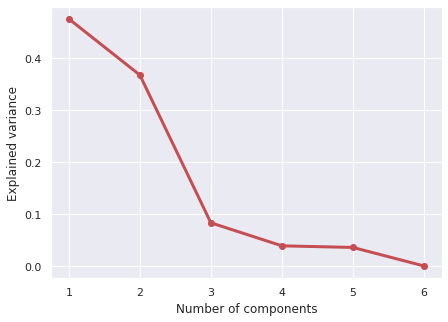

In [41]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

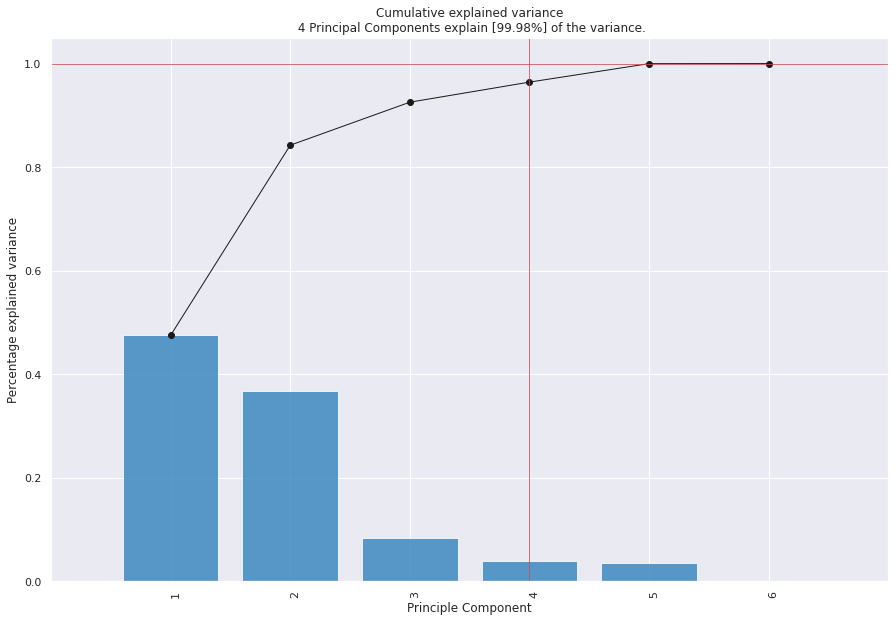

<Figure size 504x360 with 0 Axes>

In [42]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [8143] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [8143] unique colors! Available unique colors: [9].


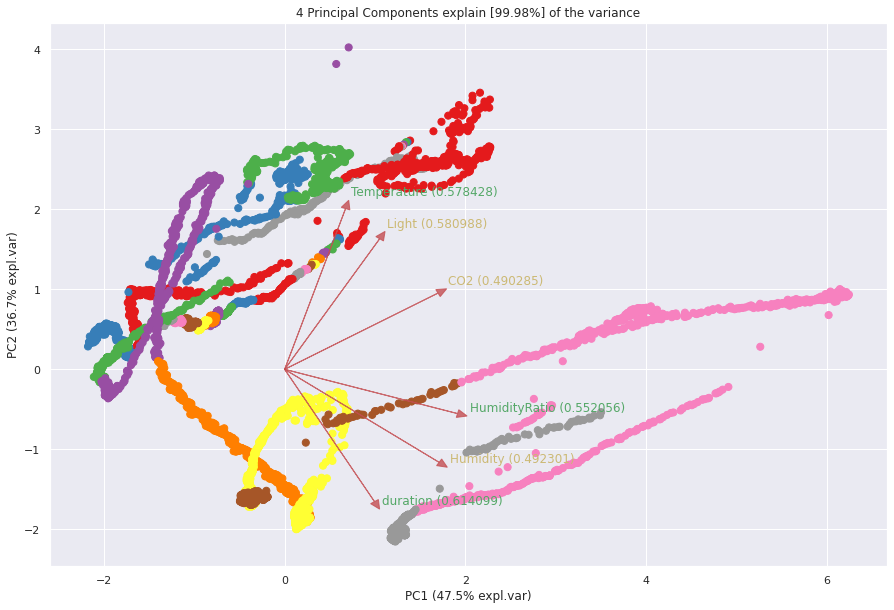

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7beaae6850>)

In [43]:
model.biplot(label=None, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [8143] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [8143] unique colors! Available unique colors: [9].


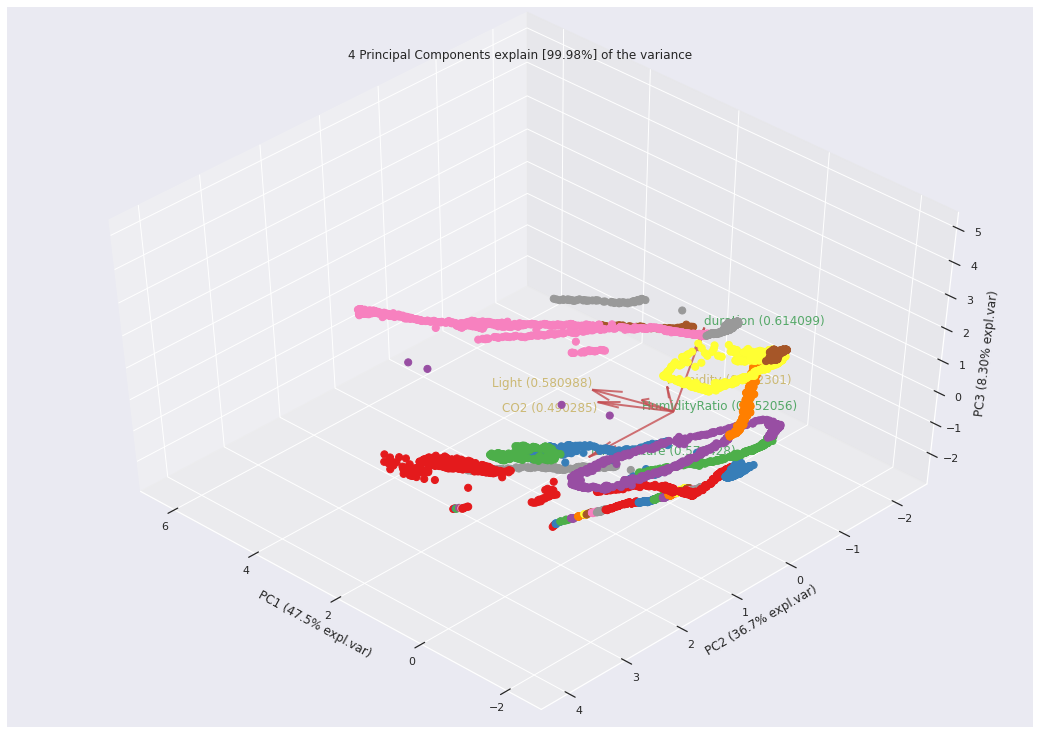

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f7beb2c4760>)

In [44]:
model.biplot3d(legend=False,label=None)

# **Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [45]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [46]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (7329, 7)
Unseen Data For Predictions: (814, 7)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [47]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (7329, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (5130, 6)
12                    Transformed Test Set         (2199, 6)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              e2a3
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [48]:
# show the best model and their statistics
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9955  0.9994  0.9879  0.9907   
rf               Random Forest Classifier    0.9945  0.9991  0.9869  0.9871   
gbc          Gradient Boosting Classifier    0.9943  0.9990  0.9869  0.9862   
lightgbm  Light Gradient Boosting Machine    0.9940  0.9991  0.9860  0.9853   
knn                K Neighbors Classifier    0.9934  0.9986  0.9851  0.9835   
dt               Decision Tree Classifier    0.9934  0.9893  0.9823  0.9861   
ada                  Ada Boost Classifier    0.9914  0.9987  0.9851  0.9746   
qda       Quadratic Discriminant Analysis    0.9889  0.9938  0.9935  0.9557   
ridge                    Ridge Classifier    0.9883  0.0000  0.9972  0.9498   
lda          Linear Discriminant Analysis    0.9883  0.9929  0.9981  0.9491   
nb                            Naive Bayes    0.9844  0.9941  0.9963  0.9341   
lr                    Logistic Regression    0.9830  0.9935  0.9683  0.9516   
svm                   SVM - Linear Kernel    0.8012  0.0000  0.6266  0.5267   
dummy                    Dummy Classifier    0.7912  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
et        0.9893  0.9864  0.9864     0.277  
rf        0.9869  0.9835  0.9836     0.417  
gbc       0.9865  0.9829  0.9830     0.516  
lightgbm  0.9856  0.9818  0.9818     0.189  
knn       0.9842  0.9800  0.9801     0.050  
dt        0.9841  0.9799  0.9800     0.024  
ada       0.9796  0.9742  0.9743     0.229  
qda       0.9740  0.9670  0.9674     0.020  
ridge     0.9728  0.9654  0.9659     0.017  
lda       0.9728  0.9654  0.9660     0.023  
nb        0.9640  0.9541  0.9550     0.019  
lr        0.9597  0.9490  0.9491     0.455  
svm       0.5602  0.4357  0.4477     0.046  
dummy     0.0000  0.0000  0.0000     0.020

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [49]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [50]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9903  0.9802  0.9630  0.9905  0.9765  0.9704  0.9705
1       0.9961  0.9907  0.9813  1.0000  0.9906  0.9881  0.9882
2       0.9942  0.9963  1.0000  0.9727  0.9862  0.9825  0.9826
3       0.9922  0.9916  0.9907  0.9725  0.9815  0.9765  0.9766
4       0.9903  0.9870  0.9813  0.9722  0.9767  0.9706  0.9706
5       0.9942  0.9894  0.9813  0.9906  0.9859  0.9822  0.9822
6       0.9883  0.9754  0.9533  0.9903  0.9714  0.9641  0.9644
7       0.9981  0.9988  1.0000  0.9907  0.9953  0.9941  0.9941
8       0.9922  0.9882  0.9813  0.9813  0.9813  0.9764  0.9764
9       0.9981  0.9953  0.9907  1.0000  0.9953  0.9941  0.9941
Mean    0.9934  0.9893  0.9823  0.9861  0.9841  0.9799  0.9800
SD      0.0032  0.0068  0.0141  0.0102  0.0077  0.0097  0.0096

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [51]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [52]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9961  1.0000  0.9907  0.9907  0.9907  0.9883  0.9883
1       0.9942  0.9953  0.9720  1.0000  0.9858  0.9821  0.9823
2       0.9922  0.9963  1.0000  0.9640  0.9817  0.9767  0.9770
3       0.9922  0.9928  0.9907  0.9725  0.9815  0.9765  0.9766
4       0.9825  0.9865  0.9439  0.9712  0.9573  0.9463  0.9465
5       0.9942  0.9953  0.9720  1.0000  0.9858  0.9821  0.9823
6       0.9922  0.9894  0.9720  0.9905  0.9811  0.9762  0.9763
7       0.9961  1.0000  1.0000  0.9817  0.9907  0.9883  0.9883
8       0.9903  0.9894  0.9626  0.9904  0.9763  0.9702  0.9703
9       0.9981  1.0000  0.9907  1.0000  0.9953  0.9941  0.9941
Mean    0.9928  0.9945  0.9794  0.9861  0.9826  0.9781  0.9782
SD      0.0041  0.0046  0.0171  0.0125  0.0100  0.0126  0.0125

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [53]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [54]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [55]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [56]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9961  0.9998  0.9907  0.9907  0.9907  0.9883  0.9883
1       0.9922  1.0000  0.9626  1.0000  0.9810  0.9761  0.9763
2       0.9942  0.9998  1.0000  0.9727  0.9862  0.9825  0.9826
3       0.9883  0.9928  0.9907  0.9550  0.9725  0.9651  0.9653
4       0.9922  0.9950  0.9907  0.9725  0.9815  0.9765  0.9766
5       0.9942  0.9998  0.9907  0.9815  0.9860  0.9823  0.9824
6       0.9922  0.9996  0.9720  0.9905  0.9811  0.9762  0.9763
7       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
8       0.9883  0.9996  0.9720  0.9720  0.9720  0.9646  0.9646
9       0.9961  0.9999  0.9813  1.0000  0.9906  0.9881  0.9882
Mean    0.9934  0.9986  0.9851  0.9835  0.9842  0.9800  0.9801
SD      0.0034  0.0024  0.0120  0.0145  0.0081  0.0102  0.0102

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [57]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9903  0.9953  0.9537  1.0000  0.9763  0.9702  0.9706
1       0.9942  1.0000  0.9720  1.0000  0.9858  0.9821  0.9823
2       0.9961  0.9999  0.9813  1.0000  0.9906  0.9881  0.9882
3       0.9922  0.9916  0.9907  0.9725  0.9815  0.9765  0.9766
4       0.9942  0.9940  0.9813  0.9906  0.9859  0.9822  0.9822
5       0.9942  0.9999  0.9720  1.0000  0.9858  0.9821  0.9823
6       0.9942  0.9999  0.9720  1.0000  0.9858  0.9821  0.9823
7       0.9981  1.0000  0.9907  1.0000  0.9953  0.9941  0.9941
8       0.9883  0.9894  0.9533  0.9903  0.9714  0.9641  0.9644
9       0.9942  1.0000  0.9720  1.0000  0.9858  0.9821  0.9823
Mean    0.9936  0.9970  0.9739  0.9953  0.9844  0.9804  0.9805
SD      0.0026  0.0039  0.0123  0.0085  0.0064  0.0080  0.0080

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [58]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=2, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

**Create Logistic Regression Model**

In [59]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9805  0.9979  0.9352  0.9712  0.9528  0.9406  0.9408
1       0.9961  0.9970  1.0000  0.9817  0.9907  0.9883  0.9883
2       0.9649  0.9847  0.9346  0.9009  0.9174  0.8952  0.8954
3       0.9766  0.9890  0.9533  0.9358  0.9444  0.9296  0.9297
4       0.9844  0.9972  0.9720  0.9541  0.9630  0.9531  0.9532
5       0.9805  0.9938  0.9533  0.9533  0.9533  0.9410  0.9410
6       0.9825  0.9959  0.9626  0.9537  0.9581  0.9470  0.9471
7       0.9844  0.9930  0.9813  0.9459  0.9633  0.9534  0.9537
8       0.9864  0.9922  0.9907  0.9464  0.9680  0.9594  0.9598
9       0.9942  0.9940  1.0000  0.9727  0.9862  0.9825  0.9826
Mean    0.9830  0.9935  0.9683  0.9516  0.9597  0.9490  0.9491
SD      0.0083  0.0039  0.0233  0.0215  0.0197  0.0249  0.0249

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [60]:
tuned_lr = tune_model(lr)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9805  0.9979  0.9352  0.9712  0.9528  0.9406  0.9408
1       0.9942  0.9976  0.9907  0.9815  0.9860  0.9823  0.9824
2       0.9649  0.9847  0.9346  0.9009  0.9174  0.8952  0.8954
3       0.9825  0.9907  0.9907  0.9298  0.9593  0.9481  0.9489
4       0.9883  0.9962  1.0000  0.9469  0.9727  0.9653  0.9659
5       0.9805  0.9938  0.9533  0.9533  0.9533  0.9410  0.9410
6       0.9883  0.9946  0.9907  0.9550  0.9725  0.9651  0.9653
7       0.9844  0.9930  0.9813  0.9459  0.9633  0.9534  0.9537
8       0.9805  0.9920  0.9533  0.9533  0.9533  0.9410  0.9410
9       0.9805  0.9936  0.9346  0.9709  0.9524  0.9401  0.9404
Mean    0.9825  0.9934  0.9664  0.9509  0.9583  0.9472  0.9475
SD      0.0073  0.0036  0.0254  0.0218  0.0173  0.0219  0.0219

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [61]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

**Create Random Forest Model**

In [62]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9961  1.0000  0.9815  1.0000  0.9907  0.9882  0.9883
1       0.9961  1.0000  0.9813  1.0000  0.9906  0.9881  0.9882
2       0.9922  0.9999  1.0000  0.9640  0.9817  0.9767  0.9770
3       0.9922  0.9968  0.9907  0.9725  0.9815  0.9765  0.9766
4       0.9922  0.9995  0.9907  0.9725  0.9815  0.9765  0.9766
5       0.9961  1.0000  0.9907  0.9907  0.9907  0.9882  0.9882
6       0.9922  0.9998  0.9720  0.9905  0.9811  0.9762  0.9763
7       0.9961  1.0000  0.9907  0.9907  0.9907  0.9882  0.9882
8       0.9942  0.9949  0.9813  0.9906  0.9859  0.9822  0.9822
9       0.9981  1.0000  0.9907  1.0000  0.9953  0.9941  0.9941
Mean    0.9945  0.9991  0.9869  0.9871  0.9869  0.9835  0.9836
SD      0.0021  0.0017  0.0075  0.0123  0.0050  0.0063  0.0063

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [63]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9981  1.0000  0.9907  1.0000  0.9953  0.9941  0.9941
1       0.9961  0.9906  0.9813  1.0000  0.9906  0.9881  0.9882
2       0.9922  0.9996  1.0000  0.9640  0.9817  0.9767  0.9770
3       0.9883  0.9901  0.9907  0.9550  0.9725  0.9651  0.9653
4       0.9903  0.9924  0.9813  0.9722  0.9767  0.9706  0.9706
5       0.9961  0.9985  1.0000  0.9817  0.9907  0.9883  0.9883
6       0.9922  0.9845  0.9720  0.9905  0.9811  0.9762  0.9763
7       0.9981  1.0000  0.9907  1.0000  0.9953  0.9941  0.9941
8       0.9883  0.9946  0.9720  0.9720  0.9720  0.9646  0.9646
9       0.9981  1.0000  0.9907  1.0000  0.9953  0.9941  0.9941
Mean    0.9938  0.9950  0.9869  0.9835  0.9851  0.9812  0.9813
SD      0.0038  0.0052  0.0095  0.0161  0.0090  0.0114  0.0113

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [64]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                       criterion='entropy', max_depth=5, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

#**Tune the Best Model**

In [65]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9942  0.9998  1.0000  0.9730  0.9863  0.9826  0.9827
1       0.9961  0.9999  1.0000  0.9817  0.9907  0.9883  0.9883
2       0.9766  0.9991  1.0000  0.8992  0.9469  0.9320  0.9341
3       0.9844  0.9951  0.9907  0.9381  0.9636  0.9537  0.9543
4       0.9883  0.9991  1.0000  0.9469  0.9727  0.9653  0.9659
5       0.9903  0.9998  1.0000  0.9554  0.9772  0.9710  0.9714
6       0.9883  0.9988  0.9907  0.9550  0.9725  0.9651  0.9653
7       0.9903  0.9998  1.0000  0.9554  0.9772  0.9710  0.9714
8       0.9883  0.9984  0.9907  0.9550  0.9725  0.9651  0.9653
9       0.9942  0.9999  1.0000  0.9727  0.9862  0.9825  0.9826
Mean    0.9891  0.9990  0.9972  0.9532  0.9746  0.9676  0.9681
SD      0.0053  0.0014  0.0043  0.0219  0.0120  0.0154  0.0149

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [66]:
tuned_best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [67]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

#**Classification + PCA**

In [68]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (7329, 7)
5                           Missing Values             False
6                         Numeric Features                 6
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (5130, 3)
12                    Transformed Test Set         (2199, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              cfe5
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='class',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('dummy', Dummify(target='class')),
                ('fix_perfect', Remove_100(target='class')),
                ('clean_names', Clean_Colum_Names()),
       

In [69]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9928  0.9987  0.9879  0.9780   
rf               Random Forest Classifier    0.9908  0.9990  0.9832  0.9736   
lightgbm  Light Gradient Boosting Machine    0.9908  0.9993  0.9813  0.9750   
knn                K Neighbors Classifier    0.9903  0.9983  0.9851  0.9691   
gbc          Gradient Boosting Classifier    0.9891  0.9983  0.9879  0.9613   
dt               Decision Tree Classifier    0.9883  0.9809  0.9683  0.9757   
ada                  Ada Boost Classifier    0.9856  0.9964  0.9729  0.9593   
ridge                    Ridge Classifier    0.9581  0.0000  0.9701  0.8508   
svm                   SVM - Linear Kernel    0.9577  0.0000  0.9496  0.8631   
lda          Linear Discriminant Analysis    0.9575  0.9899  0.9785  0.8436   
qda       Quadratic Discriminant Analysis    0.9567  0.9903  0.9599  0.8522   
lr                    Logistic Regression    0.9563  0.9908  0.9234  0.8749   
nb                            Naive Bayes    0.9464  0.9859  0.9104  0.8452   
dummy                    Dummy Classifier    0.7912  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
et        0.9828  0.9783  0.9784     0.282  
rf        0.9782  0.9724  0.9725     0.425  
lightgbm  0.9781  0.9724  0.9724     0.097  
knn       0.9769  0.9707  0.9709     0.051  
gbc       0.9743  0.9674  0.9676     0.452  
dt        0.9719  0.9645  0.9646     0.023  
ada       0.9658  0.9567  0.9569     0.211  
ridge     0.9064  0.8795  0.8828     0.019  
svm       0.9037  0.8767  0.8788     0.023  
lda       0.9059  0.8787  0.8828     0.023  
qda       0.9026  0.8749  0.8777     0.019  
lr        0.8983  0.8705  0.8712     0.029  
nb        0.8764  0.8422  0.8433     0.020  
dummy     0.0000  0.0000  0.0000     0.019

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


In [70]:
best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Tune the Best Model**

In [71]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9922  0.9988  1.0000  0.9643  0.9818  0.9769  0.9771
1       0.9961  0.9991  1.0000  0.9817  0.9907  0.9883  0.9883
2       0.9688  0.9939  1.0000  0.8699  0.9304  0.9105  0.9141
3       0.9805  0.9954  0.9907  0.9217  0.9550  0.9425  0.9435
4       0.9727  0.9962  1.0000  0.8843  0.9386  0.9211  0.9240
5       0.9864  0.9975  1.0000  0.9386  0.9683  0.9596  0.9604
6       0.9864  0.9971  1.0000  0.9386  0.9683  0.9596  0.9604
7       0.9825  0.9970  1.0000  0.9224  0.9596  0.9485  0.9497
8       0.9825  0.9972  1.0000  0.9224  0.9596  0.9485  0.9497
9       0.9864  0.9993  1.0000  0.9386  0.9683  0.9596  0.9604
Mean    0.9834  0.9972  0.9991  0.9283  0.9621  0.9515  0.9528
SD      0.0078  0.0016  0.0028  0.0315  0.0172  0.0221  0.0211

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [72]:
tuned_best_model_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [73]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [74]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
print("Numpy version: ", np.__version__)

Numpy version:  1.19.5


In [76]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [77]:
import shap

In [78]:
rf_pca = create_model('et') #extratrees algorithm chosen

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9864  0.9995  0.9630  0.9720  0.9674  0.9588  0.9588
1       0.9981  0.9998  1.0000  0.9907  0.9953  0.9941  0.9941
2       0.9903  0.9994  1.0000  0.9554  0.9772  0.9710  0.9714
3       0.9903  0.9914  0.9907  0.9636  0.9770  0.9708  0.9709
4       0.9942  0.9980  0.9907  0.9815  0.9860  0.9823  0.9824
5       0.9961  1.0000  1.0000  0.9817  0.9907  0.9883  0.9883
6       0.9903  0.9996  0.9813  0.9722  0.9767  0.9706  0.9706
7       0.9981  1.0000  0.9907  1.0000  0.9953  0.9941  0.9941
8       0.9903  0.9996  0.9813  0.9722  0.9767  0.9706  0.9706
9       0.9942  0.9999  0.9813  0.9906  0.9859  0.9822  0.9822
Mean    0.9928  0.9987  0.9879  0.9780  0.9828  0.9783  0.9784
SD      0.0037  0.0025  0.0110  0.0129  0.0088  0.0111  0.0111

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [79]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9922  0.9988  1.0000  0.9643  0.9818  0.9769  0.9771
1       0.9961  0.9991  1.0000  0.9817  0.9907  0.9883  0.9883
2       0.9688  0.9939  1.0000  0.8699  0.9304  0.9105  0.9141
3       0.9805  0.9954  0.9907  0.9217  0.9550  0.9425  0.9435
4       0.9727  0.9962  1.0000  0.8843  0.9386  0.9211  0.9240
5       0.9864  0.9975  1.0000  0.9386  0.9683  0.9596  0.9604
6       0.9864  0.9971  1.0000  0.9386  0.9683  0.9596  0.9604
7       0.9825  0.9970  1.0000  0.9224  0.9596  0.9485  0.9497
8       0.9825  0.9972  1.0000  0.9224  0.9596  0.9485  0.9497
9       0.9864  0.9993  1.0000  0.9386  0.9683  0.9596  0.9604
Mean    0.9834  0.9972  0.9991  0.9283  0.9621  0.9515  0.9528
SD      0.0078  0.0016  0.0028  0.0315  0.0172  0.0221  0.0211

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


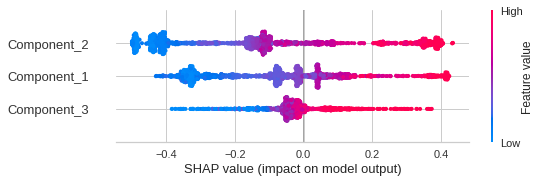

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [80]:
interpret_model(tuned_rf_pca, plot='summary')

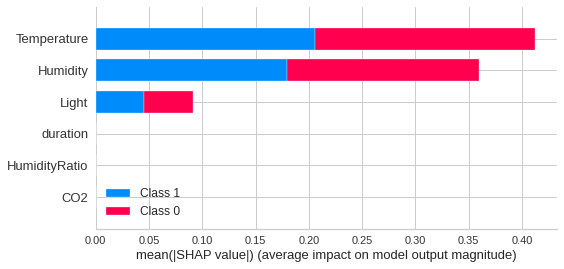

In [81]:
explainer = shap.TreeExplainer(tuned_rf_pca)
X = df.drop('class', axis=1)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [82]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values
INFO:logs:model type detected: Unknown


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [83]:
interpret_model(tuned_rf_pca, plot='reason')

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features=1.0, max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0,
                     min_impurity_split=None, min_samples_leaf=4,
                     min_samples_split=7, min_weight_fraction_leaf=0.0,
                     n_estimators=200, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=reason, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: reason
INFO:logs:model type detected: type 1
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................
